## Import Functions

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os
import shutil

## Read-CSV

In [5]:
df=pd.read_csv("/Users/maharshichattopadhyay/CrowdAnalytix/Coffee_Table_Top/CSV/Coffee_Material_Fourth.csv")
#df.head()
df.drop(columns=["Unnamed: 0"],inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
l1=df['Predictions']
l2=df['Actual']
l3=[]
for i in range(len(l1)):
    if l1[i]==l2[i]:
        l3.append("Correct")
    else:
        l3.append("Wrong")
df['Correctness']=l3 
df['Correctness'].value_counts()

Correct    165
Wrong       65
Name: Correctness, dtype: int64

## Confusion-Matrix Plot

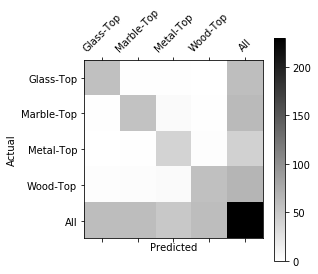

In [4]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
df_confusion = pd.crosstab(df['Predictions'], df['Actual'], rownames=['Actual'], colnames=['Predicted'], margins=True)
plot_confusion_matrix(df_confusion)

In [17]:
Actual=df['Actual']
Predicted=df['Predictions']
x=pd.crosstab(Actual,Predicted,rownames=['Actual'], colnames=['Predicted'], margins=True)
x.to_csv("/Users/maharshichattopadhyay/CrowdAnalytix/Coffee_Table_Top/CSV/Coffee-Table-Top-Material-Confusion-Matrix-InceptionResnet-1-Layer-Operation.csv")

## Error Analysis Total

In [6]:
wrong=df.iloc[np.where(df['Correctness']=="Wrong")]
wrong.reset_index(inplace=True)
wrong.drop(columns=['index'],inplace=True)
wrong['Filename']=wrong['Filename'].str.replace("Glass-Top/","")
wrong['Filename']=wrong['Filename'].str.replace("Wood-Top/","")
wrong['Filename']=wrong['Filename'].str.replace("Metal-Top/","")
wrong['Filename']=wrong['Filename'].str.replace("Marble-Top/","")
wrong['Actual'].value_counts()

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versu

Metal-Top     11
Marble-Top     5
Wood-Top       3
Glass-Top      3
Name: Actual, dtype: int64

## Error Analysis Individual-Marble

In [7]:
Marble=wrong.iloc[np.where(wrong['Actual']=="Marble-Top")]
Marble['Predictions'].value_counts()

Wood-Top     3
Metal-Top    1
Glass-Top    1
Name: Predictions, dtype: int64

In [8]:
Marble

,Filename,Predictions,Actual,Correctness
3,Marble-Top103.jpg,Wood-Top,Marble-Top,Wrong
4,Marble-Top141.jpg,Glass-Top,Marble-Top,Wrong
5,Marble-Top144.jpg,Wood-Top,Marble-Top,Wrong
6,Marble-Top75.jpg,Metal-Top,Marble-Top,Wrong
7,Marble-Top8.jpg,Wood-Top,Marble-Top,Wrong


## Error Analysis Individual-Metal

In [9]:
Metal=wrong.iloc[np.where(wrong['Actual']=="Metal-Top")]
Metal['Predictions'].value_counts()

Wood-Top      5
Marble-Top    5
Glass-Top     1
Name: Predictions, dtype: int64

In [10]:
Metal

,Filename,Predictions,Actual,Correctness
8,Metal-Top117.jpg,Marble-Top,Metal-Top,Wrong
9,Metal-Top119.jpg,Marble-Top,Metal-Top,Wrong
10,Metal-Top152.jpg,Marble-Top,Metal-Top,Wrong
11,Metal-Top158.jpg,Wood-Top,Metal-Top,Wrong
12,Metal-Top167.jpg,Marble-Top,Metal-Top,Wrong
13,Metal-Top175.jpg,Marble-Top,Metal-Top,Wrong
14,Metal-Top20.jpg,Wood-Top,Metal-Top,Wrong
15,Metal-Top26.jpg,Wood-Top,Metal-Top,Wrong
16,Metal-Top53.jpg,Wood-Top,Metal-Top,Wrong
17,Metal-Top77.jpg,Wood-Top,Metal-Top,Wrong


## Error Analysis Individual-Wood

In [11]:
Wood=wrong.iloc[np.where(wrong['Actual']=="Wood-Top")]
Wood['Predictions'].value_counts()

Metal-Top     2
Marble-Top    1
Name: Predictions, dtype: int64

In [12]:
Wood

,Filename,Predictions,Actual,Correctness
19,Wood-Top175.jpg,Metal-Top,Wood-Top,Wrong
20,Wood-Top190.jpg,Metal-Top,Wood-Top,Wrong
21,Wood-Top302.jpg,Marble-Top,Wood-Top,Wrong


## Error Analysis Individual-Glass

In [13]:
Glass=wrong.iloc[np.where(wrong['Actual']=="Glass-Top")]
Glass['Predictions'].value_counts()

Wood-Top      2
Marble-Top    1
Name: Predictions, dtype: int64

In [14]:
Glass

,Filename,Predictions,Actual,Correctness
0,Glass-Top201.jpg,Wood-Top,Glass-Top,Wrong
1,Glass-Top289.jpg,Wood-Top,Glass-Top,Wrong
2,Glass-Top298.jpg,Marble-Top,Glass-Top,Wrong


## Copy Error Images To a Folder

In [29]:
src="/Users/maharshichattopadhyay/CrowdAnalytix/Coffee_Table_Top/Dataset/Val/"
dest="/Users/maharshichattopadhyay/CrowdAnalytix/Coffee_Table_Top/"
os.mkdir(dest+"Error_Images/")
dest="/Users/maharshichattopadhyay/CrowdAnalytix/Coffee_Table_Top/Error_Images/"
labels=['Glass-Top','Metal-Top','Marble-Top',"Wood-Top"]
image=wrong['Filename']
prediction=wrong['Predictions']
for i in range(len(wrong['Filename'])):
    for j in labels:
        src_image=src+j+"/"+image[i]
        if not os.path.isdir(dest+j):
            os.mkdir(dest+j)
        if not os.path.isdir(dest+j+"/"+prediction[i]):
            os.mkdir(dest+j+"/"+prediction[i])
        dest_image=dest+j+"/"+prediction[i]+"/"+image[i]
        if os.path.isfile(src_image):
            shutil.copy(src_image,dest_image)